# Wrangling and Analysing WeRateDogs

## Contents

<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#gathering">Gathering Data</a></li>
<li><a href="#assessing">Assessing Data</a></li>
<li><a href="#cleaning">Cleaning Data</a></li>  
<li><a href="#storing">Storing Data</a></li> 
<li><a href="#analysing">Analysing & Visualising Data</a></li> 
<li><a href="#reporting">Reporting Data</a></li> 
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#references">References</a></li> 
</ul>

<a id='intro'></a>
## Introduction

The aim of this project was to wrangle WeRateDogs Twitter data to create interesting and trustworthy analyses and visualisations. The steps taken throughout this project can be broken down into the following:

**Gathering**:    
Udacity provided the WeRateDogs enhanced Twitter archive which contains basic tweet data for all 5000+ of their tweets. This was then filtered to 2356 tweets as only the entries with ratings were kept in the dataset. The archive contains each tweet's text which was then used to extract rating, dog name, dog 'stage' i.e. (doggo, floofer, pupper, and puppo). This data was then assessed and cleaned before using the data to create analysis. Additionally, each image from the WeRate Dogs Twitter archive was run through a neural network to predict what breed of dog was present in each tweet and this file was available to download programmatically from the Udacity servers. The final stage of gathering was to use the tweet IDs in the WeRateDogs Twitter archive to query the Twitter API for each tweet's JSON data using Python's Tweepy library and to store this in a text file. 

**Assessing**:    
This data was then assessed visually and programmatically to note any issues with quality or tidiness before moving onto the cleaning stage. At least eight quality issues and two tidiness issues were detected and documented.

**Cleaning**:    
Once the issues noted in the assess stage had been cleaned programmatically the cleaned data was stored in a high quality and tidy master pandas DataFrame and could be used in analysis and for visualisations.

**Storing, Analysing, and Visualising**:    
The clean dataframe was stored in a csv file named `twitter_archive_master.csv`. The wrangled data was then analysed and visualised and at least three insights and one visualisation was produced. 

**Reporting**:    
To accompany this Jupyter Notebook, a written report called `wrangle_report.pdf` was produced to describe wrangling efforts. Additionally, a written report called `act_report.pdf` was created to communicate insights and display the visualsations produced from the wrangled data. This was written in the style of a blog post. 


Key points to keep in mind when data wrangling for this project:

- Only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
- Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
- Cleaning includes merging individual pieces of data according to the rules of tidy data.
- The fact that the rating numerators are greater than the denominators does not need to be cleaned. This unique rating system is a big part of the popularity of WeRateDogs.
- You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.

<a id='gathering'></a>
## Gathering Data

The first stage in the project was to gather the necessary data. This included manually downloading the WeRateDogs Twitter Archive file which was provided by Udacity, programmatically downloading an image prediction file hosted on Udacity's servers, and querying Twitter's API for additional data beyond that included in the WeRateDogs Twitter archive, such as retweet count and favourite count. 

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import requests
import os

### WeRateDogs Twitter Archive

The WeRateDogs Twitter archive was provided by Udacity and was therefore downloaded manually.

In [2]:
# read in the csv file that was given by Udacity
df1 = pd.read_csv("twitter-archive-enhanced.csv")

In [3]:
# check that the read in worked
df1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Image Predictions

The tweet image predictions text file containing the predictions of which breed of dog is present in the tweet according to a neural network was downloaded programmatically as shown below. 

In [4]:
# Make directory if it doesn't already exist
folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [5]:
# use Requests library to get tweet image predictions
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

In [6]:
response.content;

In [7]:
with open(os.path.join(folder_name,
                      url.split('/')[-1]), mode ='wb') as file:
    file.write(response.content)

In [8]:
os.listdir(folder_name)

['image-predictions.tsv']

In [9]:
df2 = pd.read_csv("image_predictions/image-predictions.tsv", delimiter ='\t')

In [10]:
df2

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


### Twitter API

To be able to query the Twitter API I created a developer account with Twitter. The following code, provided by Udacity, was then used to extract data from the Twitter API. 

In [11]:
# API Keys, Secrets and Tokens have been removed for the purposes of submission
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth_handler=auth, 
                 wait_on_rate_limit=True, 
                 wait_on_rate_limit_notify=True)

In [12]:
tweet_ids = df1.tweet_id.values
len(tweet_ids)

2356

In [ ]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [13]:
# list of dictionaries to build and convert to a dataframe
df_list = []

with open('tweet_json.txt', 'r') as json_file:
    for tweet in json_file:
        data = json.loads(tweet)
        df_list.append({'tweet_id': data['id'],
                       'retweets': data['retweet_count'],
                       'favourites': data['favorite_count'],
                       'timestamp': data['created_at']})

In [14]:
# Create DataFrame from list of dictionaries
df_api = pd.DataFrame(df_list, columns = ['tweet_id', 'retweets', 'favourites', 'timestamp'])

In [15]:
df_api

,tweet_id,retweets,favourites,timestamp


As shown above only 2330 tweets were retrieved from the API, for reasons such as 'no status found with that ID' and 'Sorry, you are not authorized to see this status', therefore the file provided by Udacity was used for completeness and the purpose of submission. The file provided by Udacity is named `tweet-json.txt`. Note the difference from the text file created using the API which is `tweet_json.txt`.

In [16]:
df_list3 = []

with open('tweet-json.txt', 'r') as json_file:
    for tweet in json_file:
        data = json.loads(tweet)
        df_list3.append({'tweet_id': data['id'],
                       'retweets': data['retweet_count'],
                       'favourites': data['favorite_count'],
                       'timestamp': data['created_at']})

In [17]:
# Create DataFrame from list of dictionaries
df3 = pd.DataFrame(df_list3, columns = ['tweet_id', 'retweets', 'favourites', 'timestamp'])

In [18]:
df3

,tweet_id,retweets,favourites,timestamp
0,892420643555336193,8853,39467,Tue Aug 01 16:23:56 +0000 2017
1,892177421306343426,6514,33819,Tue Aug 01 00:17:27 +0000 2017
2,891815181378084864,4328,25461,Mon Jul 31 00:18:03 +0000 2017
3,891689557279858688,8964,42908,Sun Jul 30 15:58:51 +0000 2017
4,891327558926688256,9774,41048,Sat Jul 29 16:00:24 +0000 2017
...,...,...,...,...
2349,666049248165822465,41,111,Mon Nov 16 00:24:50 +0000 2015
2350,666044226329800704,147,311,Mon Nov 16 00:04:52 +0000 2015
2351,666033412701032449,47,128,Sun Nov 15 23:21:54 +0000 2015
2352,666029285002620928,48,132,Sun Nov 15 23:05:30 +0000 2015


The gathering part of the project was therefore initally completed however it is important to note that this is indeed an iterative process.

<a id='assessing'></a>
## Assessing Data

The next stage in the project was to assess the data visually and programmatically to look for quality and tidiness issues. Assessing data follows two steps, these are detecting issues and then documenting these issues. This will be done for each pandas DataFrame that the different data was gathered into. Throughout Data Quality Dimensions will be considered and the four main dimensions are: Completeness, Validity, Accuracy, Consistency.

The data was first inspected visually.


In [19]:
#display df1 - the Twitter Archive DataFrame
df1

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


It is evident that there are 2356 rows and 17 columns in the `df1` dataset.

`df1` columns:
- **tweet id** : id of the tweet
- **in_reply_to_status_id** : Status id the tweet was replying to
- **in_reply_to_user_id**: User id the tweet was replying to
- **timestamp** : time the tweet was posted
- **source**: source of tweet
- **text**: Text written in the tweet
- **retweeted_status_id**: Status id of retweet
- **retweeted_status_user_id**: User id of retweet
- **retweeted_status_timestamp**: Time of retweet
- **expanded_urls**: Link to the tweet
- **rating numerator**: The rating numerator to score the dog. Usually greater than 10 since they're good dogs Brent.
- **rating denominator**: The rating denominator is usually out of 10.
- **name**: The name of the dog.
- **doggo**: A big pupper, usually older.
- **floofer**: Any dog really. However this label is commonly given to dogs with seemingly excess fur.
- **pupper**: A small doggo, usually younger.
- **puppo**: A transitional phase between pupper and doggo. Easily understood as the dog equivalent of a teenager.

In [20]:
# See the first few rows of the dataset
df1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [21]:
# See the last 5 rows of the dataset
df1.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [22]:
# Sample 5 rows from the dataset
df1.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
337,832397543355072512,NaN,NaN,2017-02-17 01:13:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Eevee. She wants to see how you're doi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/832397543...,12,10,Eevee,None,None,None,None
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
2101,670691627984359425,NaN,NaN,2015-11-28 19:51:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ester. He has a cocaine problem. This ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670691627...,8,10,Ester,None,None,None,None
2297,667073648344346624,NaN,NaN,2015-11-18 20:15:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is Dave. He is actually just a skinny leg...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667073648...,10,10,Dave,None,None,None,None


In [23]:
# info about datatypes and null values
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [24]:
# summary statistics 
df1.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [26]:
# look at expanded urls as some look to have 2 links
pd.options.display.max_colwidth = 100 # want to see whole link
df1.expanded_urls.sample(5)

1682                                        https://twitter.com/dog_rates/status/681891461017812993/photo/1
1900                                        https://twitter.com/dog_rates/status/674664755118911488/photo/1
1458                                        https://twitter.com/dog_rates/status/695074328191332352/photo/1
979                                         https://twitter.com/dog_rates/status/749981277374128128/photo/1
577     https://twitter.com/littlewiewel/status/800852955880628224,https://twitter.com/littlewiewel/stat...
Name: expanded_urls, dtype: object

In [27]:
# further look into the rating_denominator values
df1.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [28]:
# further look into the rating_numerator values
df1.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [29]:
# most numerators seem to be less than 15 so looking at those above
df1.query("rating_numerator > 15")

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed...",NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/st...",84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clickin...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034220126208/photo/1,27,10,Sophie,None,None,pupper,None


In [30]:
# Look at the dog names
df1.name.value_counts()

None       745
a           55
Charlie     12
Cooper      11
Oliver      11
          ... 
Tuck         1
Trevith      1
Mark         1
Jockson      1
Tito         1
Name: name, Length: 957, dtype: int64

In [31]:
# Check for duplicates
df1[df1.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [32]:
# check for nulls in name column or have these all been replaced by 'None'
sum(df1.name.isnull())

0

In [33]:
# check for nulls in doggo column or have these all been replaced by 'None' or 'Doggo'
sum(df1.doggo.isnull())

0

In [34]:
# check for nulls in floofer column or have these all been replaced by 'None'
sum(df1.floofer.isnull())

0

In [35]:
# Look at df2 i.e the predictions table
df2

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


It is clear from the above that there are 2075 rows and 12 columns. 

`df2` columns:
- **tweet id**: is the last part of the tweet URL after "status/"
- **jpg_url** : Url linking to the photo of the dog (a few have been selected and checked)
- **img_num**: Appears to mean image number but it's unclear how this relates
- **p1** : is the algorithm's #1 prediction for the image in the tweet
- **p1_conf**: is how confident the algorithm is in its #1 prediction 
- **p1_dog**: is whether or not the #1 prediction is a breed of dog 
- **p2**: is the algorithm's second most likely prediction 
- **p2_conf**: is how confident the algorithm is in its #2 prediction
- **p2_dog**: is whether or not the #2 prediction is a breed of dog
- **p3** : is the algorithm's third most likely prediction 
- **p3_conf**: is how confident the algorithm is in its #3 prediction
- **p3_dog**: is whether or not the #3 prediction is a breed of dog

In [36]:
# look at the first few rows
df2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [37]:
# look at the last few rows
df2.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [38]:
# Sample 5 random rows from dataset
df2.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1101,720785406564900865,https://pbs.twimg.com/media/CgC-gMCWcAAawUE.jpg,1,Chihuahua,0.896422,True,dingo,0.027929,False,kelpie,0.017916,True
1355,760290219849637889,https://pbs.twimg.com/ext_tw_video_thumb/760289324994879489/pu/img/3ItvBEoo4aebPfvr.jpg,1,Old_English_sheepdog,0.302200,True,Lhasa,0.258803,True,briard,0.179200,True
2017,880095782870896641,https://pbs.twimg.com/media/DDa6ckbXgAAM1vV.jpg,1,miniature_pinscher,0.120298,True,Rhodesian_ridgeback,0.106395,True,beagle,0.106073,True
1766,826848821049180160,https://pbs.twimg.com/media/C3mOnZ_XUAAjr2V.jpg,4,Great_Pyrenees,0.858764,True,golden_retriever,0.023526,True,Pekinese,0.017104,True
1884,847606175596138505,https://pbs.twimg.com/media/C8NNUDBUMAE0XxJ.jpg,1,Cardigan,0.413688,True,Boston_bull,0.381836,True,doormat,0.065868,False


In [39]:
# programmatically assessing - look at datatypes and nulls
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [40]:
# get summary stats 
df2.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [41]:
# Check for duplicates
df2[df2.tweet_id.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [42]:
# Look at dataframe 3 i.e the Twitter API data
df3

,tweet_id,retweets,favourites,timestamp
0,892420643555336193,8853,39467,Tue Aug 01 16:23:56 +0000 2017
1,892177421306343426,6514,33819,Tue Aug 01 00:17:27 +0000 2017
2,891815181378084864,4328,25461,Mon Jul 31 00:18:03 +0000 2017
3,891689557279858688,8964,42908,Sun Jul 30 15:58:51 +0000 2017
4,891327558926688256,9774,41048,Sat Jul 29 16:00:24 +0000 2017
...,...,...,...,...
2349,666049248165822465,41,111,Mon Nov 16 00:24:50 +0000 2015
2350,666044226329800704,147,311,Mon Nov 16 00:04:52 +0000 2015
2351,666033412701032449,47,128,Sun Nov 15 23:21:54 +0000 2015
2352,666029285002620928,48,132,Sun Nov 15 23:05:30 +0000 2015


It is evident from the above that there are 2354 rows and 4 columns

`df3` columns:
- **tweet id**: id of tweet
- **retweets** : number of retweets
- **favourites** : number of favourites
- **timestamp** : when the tweet was posted

In [43]:
# look at first few rows
df3.head()

,tweet_id,retweets,favourites,timestamp
0,892420643555336193,8853,39467,Tue Aug 01 16:23:56 +0000 2017
1,892177421306343426,6514,33819,Tue Aug 01 00:17:27 +0000 2017
2,891815181378084864,4328,25461,Mon Jul 31 00:18:03 +0000 2017
3,891689557279858688,8964,42908,Sun Jul 30 15:58:51 +0000 2017
4,891327558926688256,9774,41048,Sat Jul 29 16:00:24 +0000 2017


In [44]:
# Look at last few rows
df3.tail()

,tweet_id,retweets,favourites,timestamp
2349,666049248165822465,41,111,Mon Nov 16 00:24:50 +0000 2015
2350,666044226329800704,147,311,Mon Nov 16 00:04:52 +0000 2015
2351,666033412701032449,47,128,Sun Nov 15 23:21:54 +0000 2015
2352,666029285002620928,48,132,Sun Nov 15 23:05:30 +0000 2015
2353,666020888022790149,532,2535,Sun Nov 15 22:32:08 +0000 2015


In [45]:
# look at random 5 rows
df3.sample(5)

,tweet_id,retweets,favourites,timestamp
1542,689517482558820352,1609,3735,Tue Jan 19 18:39:13 +0000 2016
545,805823200554876929,9374,0,Mon Dec 05 17:16:37 +0000 2016
589,799297110730567681,3227,11065,Thu Nov 17 17:04:16 +0000 2016
1602,685906723014619143,3303,8277,Sat Jan 09 19:31:20 +0000 2016
410,823269594223824897,11421,0,Sun Jan 22 20:42:21 +0000 2017


In [46]:
# programmatically assess - look at datatypes and nulls
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tweet_id    2354 non-null   int64 
 1   retweets    2354 non-null   int64 
 2   favourites  2354 non-null   int64 
 3   timestamp   2354 non-null   object
dtypes: int64(3), object(1)
memory usage: 73.7+ KB


In [47]:
# get summary stats
df3.describe()

,tweet_id,retweets,favourites
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [48]:
# check for duplicates
df3[df3.tweet_id.duplicated()]

,tweet_id,retweets,favourites,timestamp


In [49]:
# look for duplicate columns across the datasets
all_columns = pd.Series(list(df1) + list(df2) + list(df3))
all_columns[all_columns.duplicated()]

17     tweet_id
29     tweet_id
32    timestamp
dtype: object

### Quality

`df1` **- Twitter Archive Table**

 - Considerable missing data in 'in_reply_to_status_id', 'in_reply_to_user_id',  'retweeted_status_id', 'retweeted_status_user_id', and 'retweeted_status_timestamp' columns with less than 200 non-null values. 
 - Unclear column headers and unhelpful for analysis: 'in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id', 'retweeted_status_user_id', and 'retweeted_status_timestamp'. 
 - In 'expanded_urls' column there are some links that are given twice in the same row
 - In the 'name' column there are 745 named 'None'. These should instead be null values
 - In the 'doggo', 'floofer', 'pupper', and 'puppo' columns 'None' is also written 
 - In the 'name' column there are incorrect names such as 'a' which appears to be a mistake.
 - Erroneous datatypes ('timestamp' is an object and should be a datetime data type, 'tweet id' is an integer and should be a string since no calculations will be performed, 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id'  and 'retweeted_status_user_id' are floats and should also be strings, rating_numerator and rating_denominator should be floats instead of integers as a ratings sometimes include a decimal)
 - Numerator_rating and Denominator_rating have min value of 0 and numerator_rating has a max value of 1776. Some strange ratings - even for WeRateDogs. Some are joke ratings for example the 1776 as it's about a dog that looks very American. Others have the rating taken from the wrong fraction.
 
`df2` **- Image Predictions Table**
 - Erroneous datatypes ('tweet id' is an integer and should be a string since no calculations will be performed)
 - Consistency issue: Underscores in the dog breeds and sometimes lower case and sometimes upper case
 - Predictions that are not dog types for example fruits/paper towels
 - There is missing data since there are only 2075 rows compared to the 2356 from `df1`
 - Image Number column not accurate or meaningful

`df3` **- Twitter API Data Table**
 - Erroneous datatypes ('timestamp' is an object and should be a datetime data type, 'tweet id' is an integer and should be a string since no calculations will be performed)


### Tidiness

`df1` **- Twitter Archive**
 - 4 separate columns for each 'doggo', 'floofer', 'pupper', and 'puppo' i.e. dog stage is in 4 separate columns and could be 1
 - Repetitive columns for images

`df2` **- Image Predictions**
 - Several different columns to indicate dog breed

`df3` **- Twitter API Data**
- Can merge all of these DataFrames together as they are all extremely closely related and can be merged on tweet_id 
- Duplicated column names across all tables giving the same information

<a id='cleaning'></a>
## Cleaning Data

The first step in the cleaning process is to make a copy of each of the DataFrames. The for each of the issues identified in the 'Assess' stage the issue will first be defined, coded and then tested.

In [50]:
# make a copy
df1_clean = df1.copy()
df2_clean = df2.copy()
df3_clean = df3.copy()

### Quality

##### `df1`:  Missing records 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', and 'retweeted_status_timestamp' columns with less than 200 non-null values.

##### `df1`: Unhelpful for analysis: 'in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id', 'retweeted_status_user_id', and 'retweeted_status_timestamp'.

##### Define

After removing the retweet entries, drop these columns as they have so many missing records and also are unhelpful for the analysis.

##### Code

In [51]:
# removing retweets 
df1_clean = df1_clean[df1_clean.retweeted_status_id.isnull()]

In [52]:
# Dealing with missing records
df1_clean = df1_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis = 1)

##### Test

In [53]:
#check the drop worked
df1_clean

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t....,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available fo...",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know w...,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD3...,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and sh...","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/st...",12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10...,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
2352,666044226329800704,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unpl...,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would...,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2354,666029285002620928,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would w...,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None


##### `df1` In 'expanded_urls' column there are some links that are given twice in the same row

##### Define:

In the expanded_urls column there are links which are given twice in the same cell so only the first link should be kept as this prevents the hyperlink from working. These links are separated by a comma so the second link can be removed

##### Code:

In [54]:
df1_clean.expanded_urls.head(10)

0                                        https://twitter.com/dog_rates/status/892420643555336193/photo/1
1                                        https://twitter.com/dog_rates/status/892177421306343426/photo/1
2                                        https://twitter.com/dog_rates/status/891815181378084864/photo/1
3                                        https://twitter.com/dog_rates/status/891689557279858688/photo/1
4    https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/st...
5                                        https://twitter.com/dog_rates/status/891087950875897856/photo/1
6    https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991...
7    https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/st...
8                                        https://twitter.com/dog_rates/status/890609185150312448/photo/1
9                                        https://twitte

In [55]:
# removing everything after the comma
df1_clean["expanded_urls"] = df1_clean["expanded_urls"].str.split(",", expand=True)[0]

##### Test:

In [56]:
df1_clean.expanded_urls.head(5)

0    https://twitter.com/dog_rates/status/892420643555336193/photo/1
1    https://twitter.com/dog_rates/status/892177421306343426/photo/1
2    https://twitter.com/dog_rates/status/891815181378084864/photo/1
3    https://twitter.com/dog_rates/status/891689557279858688/photo/1
4    https://twitter.com/dog_rates/status/891327558926688256/photo/1
Name: expanded_urls, dtype: object

In [57]:
df1_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t....,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available fo...",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know w...,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD3...,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and sh...",https://twitter.com/dog_rates/status/891327558926688256/photo/1,12,10,Franklin,None,None,None,None


##### `df1`: In the 'name'  column there are 745 dogs named 'None'. These should be replaced by null values. This is the same for the dog stage columns but these will be dealt with later in the Tidiness section of this Cleaning Data section of the report.

##### Define:

In the name column 'None' should be replaced with a Null Value

##### Code:

In [58]:
# replace none will null values for name column
df1_clean.name.replace('None', np.nan, inplace = True)

##### Test:

In [59]:
df1_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t....,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available fo...",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know w...,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD3...,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and sh...",https://twitter.com/dog_rates/status/891327558926688256/photo/1,12,10,Franklin,None,None,None,None


In [60]:
# check 'None' doesn't appear
df1_clean.name.value_counts()

a          55
Lucy       11
Charlie    11
Cooper     10
Oliver     10
           ..
Ivar        1
Venti       1
Schnozz     1
Edmund      1
Glenn       1
Name: name, Length: 955, dtype: int64

####  `df1`: In the 'name' column there are incorrect names such as 'a' which appears to be a mistake.


##### Define:

Replace incorrect names such as 'a', 'actually' etc. with nulls. Using Excel, the lowercase names were highlighted to show where a word has been incorrectly used as a name. These were found to be:
 - a
 - actually
 - all
 - an
 - by
 - his
 - life
 - light
 - my
 - officially
 - old
 - space
 - very
 

Since this was visually assessed it will be beneficial to highlight the lowercase names using Python since due to human error some will have probably been missed.

##### Code:

In [61]:
# get those names starting with a lower case letter
df1_clean.name[df1_clean.name.str.islower().fillna(False)].unique()

array(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'very', 'my',
       'his', 'an', 'actually', 'just', 'getting', 'mad', 'this',
       'unacceptable', 'all', 'old', 'infuriating', 'the', 'by',
       'officially', 'life', 'light', 'space'], dtype=object)

In [62]:
# replace names with a lowercase letter by nulls
df1_clean[['name']] = df1_clean[['name']].replace(dict.fromkeys(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'very', 'my',
       'his', 'an', 'actually', 'just', 'getting', 'mad', 'this',
       'unacceptable', 'all', 'old', 'infuriating', 'the', 'by',
       'officially', 'life', 'light', 'space', np.nan], np.nan))

##### Test:

In [63]:
df1_clean.name.value_counts()

Lucy       11
Charlie    11
Cooper     10
Oliver     10
Tucker      9
           ..
Ivar        1
Venti       1
Schnozz     1
Edmund      1
Rubio       1
Name: name, Length: 930, dtype: int64

In [64]:
df1_clean[df1_clean.name == 'actually']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### Erroneous datatypes for all dataframes (timestamp should be datetime data type and 'tweet_id' should be a string)

##### Define:


Convert timestamp to datetime data type. Convert tweet id to string. Convert rating_numerator and rating_denominator to floats. The 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id' and 'retweeted_status_user_id' are floats and should also be strings but these have been removed already. Since we already have timestamp in `df1` I will leave the timestamp as it is for `df3` and drop the timestamp in `df3` since these will be merged into a master csv.

#### Code:

In [65]:
# Convert to datetime 
df1_clean.timestamp = pd.to_datetime(df1_clean.timestamp)

# To string 
df1_clean.tweet_id = df1_clean.tweet_id.astype('object')
df2_clean.tweet_id = df2_clean.tweet_id.astype('object')
df3_clean.tweet_id = df3_clean.tweet_id.astype('object')

# To float
df1_clean.rating_numerator = df1_clean.rating_numerator.astype('float')
df1_clean.rating_denominator = df1_clean.rating_denominator.astype('float')

In [66]:
#drop timestamp
df3_clean.drop('timestamp', axis=1, inplace=True)

#### Test:

In [67]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   object             
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   object             
 3   text                2175 non-null   object             
 4   expanded_urls       2117 non-null   object             
 5   rating_numerator    2175 non-null   float64            
 6   rating_denominator  2175 non-null   float64            
 7   name                1391 non-null   object             
 8   doggo               2175 non-null   object             
 9   floofer             2175 non-null   object             
 10  pupper              2175 non-null   object             
 11  puppo               2175 non-null   object             
dtypes: datetime64[ns, UTC](1), float64

In [68]:
df2_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [69]:
df3_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tweet_id    2354 non-null   object
 1   retweets    2354 non-null   int64 
 2   favourites  2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


#### `df1`: Minimum rating denominator is 0 and there is a max numerator of 1776.  

##### Define:

Change denominator rating from 0 to 10. This will be important later in analyses when comparing ratings to avoid a ZeroDivisionError. Also investigate the higher numerator ratings.

##### Code:

In [70]:
pd.options.display.max_colwidth = 100
df1_clean.text[df1_clean.rating_denominator == 0.0]

313    @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
Name: text, dtype: object

In [71]:
# replacing value based on index
df1_clean.loc[313,'rating_denominator'] = 10.0

In [72]:
df1_clean.loc[313,'rating_numerator'] = 13.0

In [73]:
pd.options.display.max_colwidth = 500
df1_clean.query("rating_numerator > 15")

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
55,881633300179243008,2017-07-02 21:58:53+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,NaN,17.0,10.0,NaN,None,None,None,None
188,855862651834028034,2017-04-22 19:15:32+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,NaN,420.0,10.0,NaN,None,None,None,None
189,855860136149123072,2017-04-22 19:05:32+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",NaN,666.0,10.0,NaN,None,None,None,None
290,838150277551247360,2017-03-04 22:12:52+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@markhoppus 182/10,NaN,182.0,10.0,NaN,None,None,None,None
433,820690176645140481,2017-01-15 17:52:40+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,https://twitter.com/dog_rates/status/820690176645140481/photo/1,84.0,70.0,NaN,None,None,None,None
516,810984652412424192,2016-12-19 23:06:23+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,https://www.gofundme.com/sams-smile,24.0,7.0,Sam,None,None,None,None
695,786709082849828864,2016-10-13 23:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",https://twitter.com/dog_rates/status/786709082849828864/photo/1,75.0,10.0,Logan,None,None,None,None
763,778027034220126208,2016-09-20 00:24:34+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,https://twitter.com/dog_rates/status/778027034220126208/photo/1,27.0,10.0,Sophie,None,None,pupper,None
902,758467244762497024,2016-07-28 01:00:57+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,https://twitter.com/dog_rates/status/758467244762497024/video/1,165.0,150.0,NaN,None,None,None,None
979,749981277374128128,2016-07-04 15:00:45+00:00,"<a href=""https://about.twitter.com/products/tweetdeck"" rel=""nofollow"">TweetDeck</a>",This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,https://twitter.com/dog_rates/status/749981277374128128/photo/1,1776.0,10.0,Atticus,None,None,None,None


To be fixed:
 - index 55 change 17/10 to 13/10
 - index 695 change 75/10 to 9.75/10 
 - index 763 change 27/10 to 11.27/10
 - index 1202 change 50/50 to 11/10
 - index 1712 change from 26/10 to 11.26/10
 
 - index 516 replace 24/7 rating will nulls 
  
Noted to possibly be removed later depending on analysis:
 - remove 420/10
 - remove 420/10 
 - remove 666/10
 - remove 182/10
 - remove 1776/10 rating but funny

Note: those with fractions which work out to common ratings when reduced have been left

In [74]:
df1_clean.loc[55,'rating_numerator'] = 13.0
df1_clean.loc[55,'rating_denominator'] = 10.0

In [75]:
df1_clean.loc[695,'rating_numerator'] = 9.75
df1_clean.loc[695,'rating_denominator'] = 10.0

In [76]:
df1_clean.loc[763,'rating_numerator'] = 11.27
df1_clean.loc[763,'rating_denominator'] = 10.0

In [77]:
df1_clean.loc[1202,'rating_numerator'] = 11.0
df1_clean.loc[1202,'rating_denominator'] = 10.0

In [78]:
df1_clean.loc[1712,'rating_numerator'] = 11.26
df1_clean.loc[1712,'rating_denominator'] = 10.0

In [79]:
df1_clean.loc[516, 'rating_numerator'] = np.nan
df1_clean.loc[516, 'rating_denominator'] = np.nan

##### Test:

In [80]:
df1_clean.loc[516]

tweet_id                                                                                                                                                                     810984652412424192
timestamp                                                                                                                                                             2016-12-19 23:06:23+00:00
source                                                                                                       <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
text                  Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
expanded_urls                                                                                                                                               https://www.gofundme.com/sams-smile
rating_numerator                        

In [81]:
df1_clean.loc[695]

tweet_id                                                                                                                            786709082849828864
timestamp                                                                                                                    2016-10-13 23:23:56+00:00
source                                                              <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
text                  This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS
expanded_urls                                                                          https://twitter.com/dog_rates/status/786709082849828864/photo/1
rating_numerator                                                                                                                                  9.75
rating_denominator                                                                            

In [82]:
df1_clean.describe()

,rating_numerator,rating_denominator
count,2174.000000,2174.000000
mean,12.710800,10.480681
std,43.167429,6.965324
min,0.000000,2.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


#### `df2`: Consistency issue: Underscores in the dog breeds and sometimes lower case and sometimes upper case

##### Define:

Remove the underscores in the dog breeds and replace with a space and then also standardise to all be lowercase

##### Code:

In [83]:
df2_clean.p1 = df2_clean.p1.str.replace('_', ' ')

In [84]:
df2_clean.p2 = df2_clean.p2.str.replace('_', ' ')

In [85]:
df2_clean.p3 = df2_clean.p3.str.replace('_', ' ')

In [86]:
df2_clean.p1 = df2_clean.p1.str.lower()

In [87]:
df2_clean.p2 = df2_clean.p2.str.lower()

In [88]:
df2_clean.p3 = df2_clean.p3.str.lower()

##### Test:

In [89]:
df2_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh springer spaniel,0.465074,True,collie,0.156665,True,shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature pinscher,0.074192,True,rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian ridgeback,0.408143,True,redbone,0.360687,True,miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True


#### `df2`: Image predictions that are not dog breeds 

##### Define:

Remove any predictions that aren't actually dog breeds since we only want to analyse dogs in this analysis and aren't concerned with objects in the tweets that aren't of dogs. The removing of non dog objects is done based on p1_dog == False since this is the best prediction from the neural network.

##### Code:

In [90]:
df2_clean[df2_clean.p1_dog == False]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box turtle,0.933012,False,mud turtle,0.045885,False,terrapin,0.017885,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping cart,0.962465,False,shopping basket,0.014594,False,golden retriever,0.007959,True
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed sloth,0.914671,False,otter,0.015250,False,great grey owl,0.013207,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2026,882045870035918850,https://pbs.twimg.com/media/DD2oCl2WAAEI_4a.jpg,1,web site,0.949591,False,dhole,0.017326,False,golden retriever,0.006941,True
2046,886680336477933568,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,1,convertible,0.738995,False,sports car,0.139952,False,car wheel,0.044173,False
2052,887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/887517108413886465/pu/img/WanJKwssZj4VJvL9.jpg,1,limousine,0.130432,False,tow truck,0.029175,False,shopping cart,0.026321,False
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper towel,0.170278,False,labrador retriever,0.168086,True,spatula,0.040836,False


In [91]:
# drop those which aren't pictures of dogs using the top predictor
df2_clean = df2_clean.drop(df2_clean[df2_clean.p1_dog == False].index)

##### Test:

In [92]:
# Nothing should be outputted
df2_clean[df2_clean.p1_dog == False]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


#### `df2` img_num column not accurate

##### Define:

img_num column has numbers ranging from 1 to 4 but there is only one link given in the table so this column can be removed.

##### Code:

In [93]:
df2_clean.jpg_url[df2_clean.img_num > 1]

144     https://pbs.twimg.com/media/CUdtP1xUYAIeBnE.jpg
319     https://pbs.twimg.com/media/CVKZsHtWwAA6gPj.jpg
345     https://pbs.twimg.com/media/CVRkLuJWUAAhhYp.jpg
381     https://pbs.twimg.com/media/CVgbIobUYAEaeI3.jpg
382     https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg
                             ...                       
2051    https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg
2055    https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg
2056    https://pbs.twimg.com/media/DFTH_O-UQAACu20.jpg
2067    https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg
2070    https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg
Name: jpg_url, Length: 227, dtype: object

In [94]:
df2_clean.drop('img_num', axis=1, inplace=True)

##### Test:

In [95]:
df2_clean

,tweet_id,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,welsh springer spaniel,0.465074,True,collie,0.156665,True,shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826,True,miniature pinscher,0.074192,True,rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,german shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,rhodesian ridgeback,0.408143,True,redbone,0.360687,True,miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...
2068,890971913173991426,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,appenzeller,0.341703,True,border collie,0.199287,True,ice lolly,0.193548,False
2069,891087950875897856,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,chesapeake bay retriever,0.425595,True,irish terrier,0.116317,True,indian elephant,0.076902,False
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,True,english springer,0.225770,True,german short-haired pointer,0.175219,True
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True


### Tidiness

#### `df1` 4 separate columns for each 'doggo', 'floofer', 'pupper', and 'puppo' i.e. the dog stage is in 4 separate columns and could be 1

##### Define: 

Combine these 4 separate columns into just 1 named Dog Stage

##### Code:

In [96]:
df1_clean

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10.0,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",https://twitter.com/dog_rates/status/891327558926688256/photo/1,12.0,10.0,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5.0,10.0,NaN,None,None,None,None
2352,666044226329800704,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6.0,10.0,NaN,None,None,None,None
2353,666033412701032449,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9.0,10.0,NaN,None,None,None,None
2354,666029285002620928,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7.0,10.0,NaN,None,None,None,None


Udacity knowledge centre was referred to for the following code and the link has been included in the References section of this report.

In [97]:
# Replacing the string 'None' with a blank space
df1_clean.doggo.replace('None', '', inplace=True)
df1_clean.floofer.replace('None', '', inplace=True)
df1_clean.pupper.replace('None', '', inplace=True)
df1_clean.puppo.replace('None', '', inplace=True)

In [98]:
df1_clean['dog_stage'] = df1_clean.text.str.extract('(doggo|floofer|pupper|puppo)', expand = True)

In [99]:
# Including those which have been classified as both
df1_clean['dog_stage'] = df1_clean.doggo + df1_clean.floofer + df1_clean.pupper + df1_clean.puppo
df1_clean.loc[df1_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
df1_clean.loc[df1_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'
df1_clean.loc[df1_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'

In [100]:
#drop redundant columns now
df1_clean = df1_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1)

In [101]:
# replace blanks in dog_stage column with nulls
df1_clean.dog_stage.replace('', np.nan, inplace = True)

##### Test:

In [102]:
df1_clean.dog_stage.value_counts()

pupper            224
doggo              75
puppo              24
doggo, pupper      10
floofer             9
doggo, puppo        1
doggo, floofer      1
Name: dog_stage, dtype: int64

#### `df2` Several different columns relating to dog breed prediction

In [103]:
df2_clean

,tweet_id,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,welsh springer spaniel,0.465074,True,collie,0.156665,True,shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826,True,miniature pinscher,0.074192,True,rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,german shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,rhodesian ridgeback,0.408143,True,redbone,0.360687,True,miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...
2068,890971913173991426,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,appenzeller,0.341703,True,border collie,0.199287,True,ice lolly,0.193548,False
2069,891087950875897856,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,chesapeake bay retriever,0.425595,True,irish terrier,0.116317,True,indian elephant,0.076902,False
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,True,english springer,0.225770,True,german short-haired pointer,0.175219,True
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True


##### Define:

There are several different columns relating to the dog breed prediction. Earlier in the cleaning process those predictions which were for the top prediction and which weren't a dog breed were dropped, therefore it makes logical sense to also drop those relating to prediction 2 and prediction 3 and to just take the top prediction which was a dog breed.

##### Code:

In [104]:
df2_clean.drop(['p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis=1, inplace=True)

##### Test:

In [105]:
df2_clean

,tweet_id,jpg_url,p1
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,welsh springer spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,german shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,rhodesian ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature pinscher
...,...,...,...
2068,890971913173991426,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,appenzeller
2069,891087950875897856,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,chesapeake bay retriever
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,chihuahua


#### Merging DataFrames and removing duplicate information

##### Define:

All of these different DataFrames (`df1_clean`, `df2_clean`, `df3_clean`) can be merged together into a single pandas DataFrame by joining on 'tweet_id'. Duplicate information and columns which contain the same information can then be removed and then the single DataFrame can be stored in a final clean master csv file named `twitter_archive_master.csv`.

##### Code:

In [106]:
# merge df1_clean and df2_clean
dfmaster_clean = pd.merge(df1_clean, df2_clean, right_on ='tweet_id', left_on='tweet_id', how='inner')

In [107]:
dfmaster_clean

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,p1
0,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,chihuahua
1,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,chihuahua
2,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",https://twitter.com/dog_rates/status/891327558926688256/photo/1,12.0,10.0,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset
3,891087950875897856,2017-07-29 00:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13.0,10.0,NaN,NaN,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,chesapeake bay retriever
4,890971913173991426,2017-07-28 16:27:12+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,https://gofundme.com/ydvmve-surgery-for-jax,13.0,10.0,Jax,NaN,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,appenzeller
...,...,...,...,...,...,...,...,...,...,...,...
1472,666049248165822465,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5.0,10.0,NaN,NaN,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature pinscher
1473,666044226329800704,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6.0,10.0,NaN,NaN,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,rhodesian ridgeback
1474,666033412701032449,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9.0,10.0,NaN,NaN,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,german shepherd
1475,666029285002620928,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7.0,10.0,NaN,NaN,https://pbs.twimg.com/media/CT42GRgUYAA5iDo

In [108]:
# merge df3_clean with the rest
dfmaster_clean = pd.merge(dfmaster_clean, df3_clean, right_on ='tweet_id', left_on='tweet_id', how='inner')

##### Test:

In [109]:
dfmaster_clean

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,p1,retweets,favourites
0,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,chihuahua,6514,33819
1,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,chihuahua,4328,25461
2,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",https://twitter.com/dog_rates/status/891327558926688256/photo/1,12.0,10.0,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,9774,41048
3,891087950875897856,2017-07-29 00:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13.0,10.0,NaN,NaN,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,chesapeake bay retriever,3261,20562
4,890971913173991426,2017-07-28 16:27:12+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,https://gofundme.com/ydvmve-surgery-for-jax,13.0,10.0,Jax,NaN,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,appenzeller,2158,12041
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1472,666049248165822465,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5.0,10.0,NaN,NaN,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature pinscher,41,111
1473,666044226329800704,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6.0,10.0,NaN,NaN,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,rhodesian ridgeback,147,311
1474,666033412701032449,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9.0,10.0,NaN,NaN,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,german shepherd,47,128
1475,666029285002620928,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,https://twitter.com

##### Define: Remove the redunant columns from the master dataset and rename p1 column

 - Looking at the final master dataset it is clear that the source column isn't very useful for analysis
 - Expanded urls can be removed since jpg_url shows the photo and the other columns contain the other useful information from the tweet
 - p1 can now be renamed to dog_breed so that our column names are descriptive

##### Code:

In [110]:
# drop the redundant columns
dfmaster_clean.drop(['source', 'expanded_urls'], axis=1, inplace=True)

In [111]:
# rename p1 to 'dog_breed'
dfmaster_clean.rename(columns = {'p1':'dog_breed'}, inplace = True)

##### Test:

In [112]:
dfmaster_clean

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,dog_breed,retweets,favourites
0,892177421306343426,2017-08-01 00:17:27+00:00,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13.0,10.0,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,chihuahua,6514,33819
1,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12.0,10.0,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,chihuahua,4328,25461
2,891327558926688256,2017-07-29 16:00:24+00:00,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12.0,10.0,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,9774,41048
3,891087950875897856,2017-07-29 00:08:17+00:00,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,13.0,10.0,NaN,NaN,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,chesapeake bay retriever,3261,20562
4,890971913173991426,2017-07-28 16:27:12+00:00,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,13.0,10.0,Jax,NaN,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,appenzeller,2158,12041
...,...,...,...,...,...,...,...,...,...,...,...
1472,666049248165822465,2015-11-16 00:24:50+00:00,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,5.0,10.0,NaN,NaN,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature pinscher,41,111
1473,666044226329800704,2015-11-16 00:04:52+00:00,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,6.0,10.0,NaN,NaN,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,rhodesian ridgeback,147,311
1474,666033412701032449,2015-11-15 23:21:54+00:00,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,9.0,10.0,NaN,NaN,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,german shepherd,47,128
1475,666029285002620928,2015-11-15 23:05:30+00:00,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,7.0,10.0,NaN,NaN,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,48,132


<a id='storing'></a>
## Storing Data

Now that the master DataFrame has been created this can be stored in a CSV file named 'twitter_archive_master.csv'.

In [113]:
# save master DataFrame to a file called 'twitter_archive_master.csv'
dfmaster_clean.to_csv('twitter_archive_master.csv', index=False)

<a id='analysing'></a>
## Analysing & Visualising Data

Now that the data has been wrangled this data can be analysed to produce insight. The questions which this report intends to answer are as follows:
 - Which dog breed is the most rated on WeRateDogs?
 - Which dog stage is the most rated on WeRateDogs?
 - Which are the most popular names for dogs on WeRateDogs?
 - Which dog breed receives the highest ratings on average?
 - Which dog breed receives the most retweets/favourites?
 - Who are the top dogs? (Looking at retweets/favourites)


In [114]:
#Import necessary visualisation packages
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

### Which dog breed is the most rated on WeRateDogs?

In [115]:
#top 10 dog breeds
breed_ratings = dfmaster_clean.dog_breed.value_counts()[:10]

In [116]:
breed_ratings

golden retriever      139
labrador retriever     95
pembroke               88
chihuahua              79
pug                    54
chow                   41
samoyed                40
toy poodle             38
pomeranian             38
malamute               29
Name: dog_breed, dtype: int64

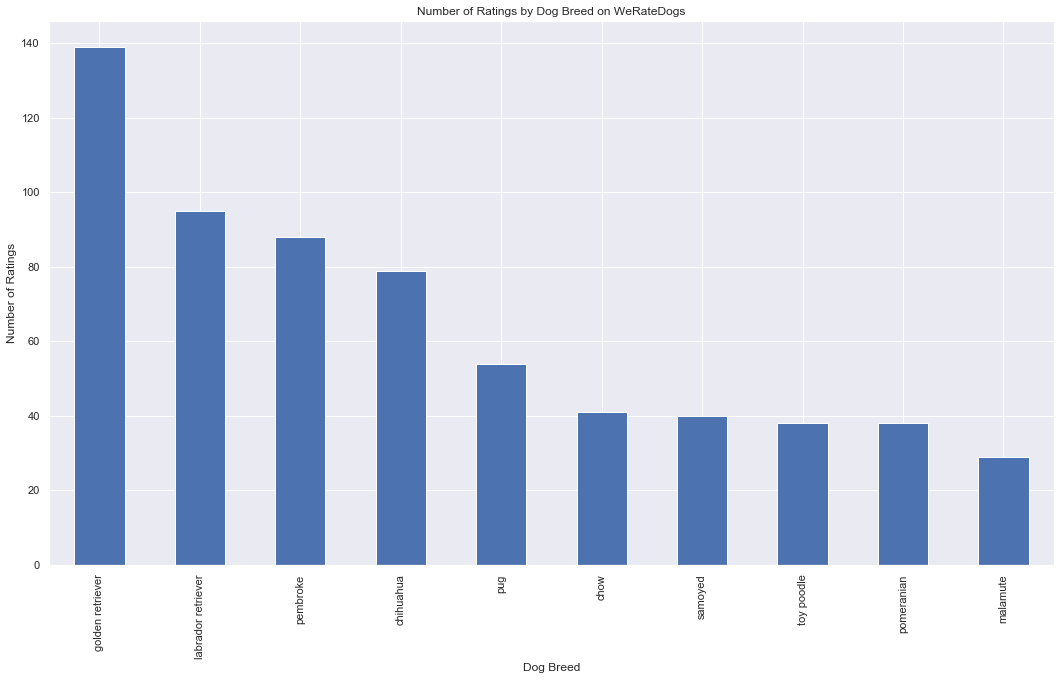

In [117]:
# Plotting bar graph for number of ratings for different dog breeds on WeRateDogs
plt.figure(figsize=(18,10))
breed_ratings.plot(kind='bar')
plt.title('Number of Ratings by Dog Breed on WeRateDogs')
plt.xlabel('Dog Breed')
plt.ylabel('Number of Ratings');

##### Conclusions:

It is clear from above that the most rated dog breed on WeRateDogs is the Golden Retriever.

### Which dog stage is rated the most on We Rate Dogs?

In [118]:
stage_ratings = dfmaster_clean.dog_stage.value_counts()
stage_ratings

pupper            144
doggo              48
puppo              19
doggo, pupper       8
floofer             7
doggo, puppo        1
doggo, floofer      1
Name: dog_stage, dtype: int64

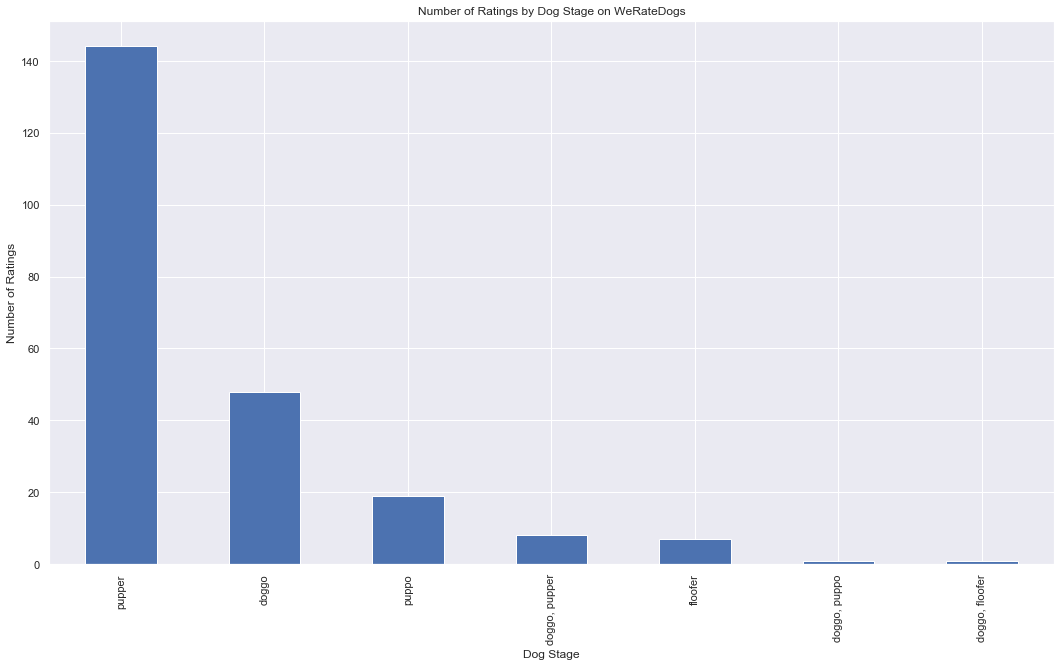

In [119]:
# Plotting bar graph for number of ratings for different dog breeds on WeRateDogs
plt.figure(figsize=(18,10))
stage_ratings.plot(kind='bar')
plt.title('Number of Ratings by Dog Stage on WeRateDogs')
plt.xlabel('Dog Stage')
plt.ylabel('Number of Ratings');

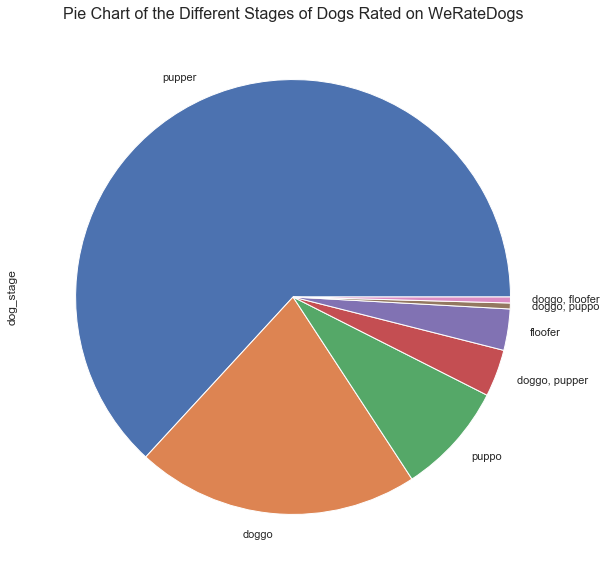

In [120]:
stage_ratings.plot(kind='pie', subplots=True, figsize=(10,10))
plt.title('Pie Chart of the Different Stages of Dogs Rated on WeRateDogs', fontsize = 16);

##### Conclusions:

It is evident that the most rated stage of dog on WeRateDogs is pupper.

### What are the most popular names for dogs on WeRateDogs?

In [121]:
# How many unique names are there?
dfmaster_clean['name'].nunique()

744

In [122]:
# What are the top 10 names?
n = 10
dfmaster_clean['name'].value_counts()[:n].index.tolist()

['Charlie',
 'Cooper',
 'Oliver',
 'Tucker',
 'Lucy',
 'Penny',
 'Daisy',
 'Sadie',
 'Koda',
 'Winston']

##### Conclusions:


The top 10 names for dogs on WeRateDogs are: 'Charlie', 'Cooper', 'Oliver', 'Tucker', 'Lucy', 'Penny', 'Sadie', 'Daisy', 'Winston', 'Koda

### Which dog breed receives the highest rating on average?

In [123]:
dfmaster_clean['total_rating'] = (dfmaster_clean.rating_numerator / dfmaster_clean.rating_denominator)

In [124]:
dfmaster_clean.groupby('dog_breed')['total_rating'].mean().sort_values(ascending = False)

dog_breed
saluki                    1.250000
briard                    1.233333
tibetan mastiff           1.225000
border terrier            1.214286
standard schnauzer        1.200000
                            ...   
norwich terrier           0.900000
scotch terrier            0.900000
walker hound              0.900000
welsh springer spaniel    0.900000
japanese spaniel          0.500000
Name: total_rating, Length: 111, dtype: float64

In [125]:
dfmaster_clean.groupby('dog_breed')['total_rating'].mean().sort_values(ascending = False)[:10]

dog_breed
saluki                1.250000
briard                1.233333
tibetan mastiff       1.225000
border terrier        1.214286
standard schnauzer    1.200000
giant schnauzer       1.200000
silky terrier         1.200000
eskimo dog            1.177778
gordon setter         1.175000
irish setter          1.175000
Name: total_rating, dtype: float64

##### Conclusions:

The dog breed that received the highest rating on average was the Saluki. The Saluki is a good boy Brent.

### Which dog breed receives the most retweets & favourites?

In [126]:
dfmaster_clean.groupby('dog_breed')['retweets'].mean().sort_values(ascending = False)[:5]

dog_breed
standard poodle     6631.857143
afghan hound        5976.000000
english springer    5973.555556
saluki              5133.750000
eskimo dog          4768.888889
Name: retweets, dtype: float64

In [127]:
dfmaster_clean.groupby('dog_breed')['favourites'].mean().sort_values(ascending = False)[:5]

dog_breed
saluki                     24060.000000
french bulldog             17913.000000
afghan hound               17326.666667
black-and-tan coonhound    17012.000000
flat-coated retriever      16791.625000
Name: favourites, dtype: float64

##### Conclusions:

Tweets featuring the standard poodle received the most retweets on average and those featuring the saluki received the most favourites on average.

### Who are the top dogs? 

In [128]:
# Selecting the most favourited tweet
dfmaster_clean.sort_values('favourites', ascending = False)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,dog_breed,retweets,favourites,total_rating
249,822872901745569793,2017-01-21 18:26:02+00:00,Here's a super supportive puppo participating in the Toronto #WomensMarch today. 13/10 https://t.co/nTz3FtorBc,13.0,10.0,NaN,puppo,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,lakeland terrier,48265,132810,1.3
617,744234799360020481,2016-06-18 18:26:18+00:00,Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4,13.0,10.0,NaN,doggo,https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg,labrador retriever,79515,131075,1.3
51,879415818425184262,2017-06-26 19:07:24+00:00,This is Duddles. He did an attempt. 13/10 someone help him (vid by Georgia Felici) https://t.co/UDT7ZkcTgY,13.0,10.0,Duddles,NaN,https://pbs.twimg.com/ext_tw_video_thumb/879415784908390401/pu/img/cX7XI1TnUsseGET5.jpg,english springer,45849,107956,1.3
326,807106840509214720,2016-12-09 06:17:20+00:00,This is Stephan. He just wants to help. 13/10 such a good boy https://t.co/DkBYaCAg2d,13.0,10.0,Stephan,NaN,https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg,chihuahua,56625,107015,1.3
95,866450705531457537,2017-05-22 00:28:40+00:00,"This is Jamesy. He gives a kiss to every other pupper he sees on his walk. 13/10 such passion, much tender https://t.co/wk7TfysWHr",13.0,10.0,Jamesy,pupper,https://pbs.twimg.com/media/DAZAUfBXcAAG_Nn.jpg,french bulldog,32883,106827,1.3
...,...,...,...,...,...,...,...,...,...,...,...,...
1469,666058600524156928,2015-11-16 01:01:59+00:00,Here is the Rand Paul of retrievers folks! He's probably good at poker. Can drink beer (lol rad). 8/10 good dog https://t.co/pYAJkAe76p,8.0,10.0,NaN,NaN,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,miniature poodle,61,115,0.8
1455,666407126856765440,2015-11-17 00:06:54+00:00,This is a southern Vesuvius bumblegruff. Can drive a truck (wow). Made friends with 5 other nifty dogs (neat). 7/10 https://t.co/LopTBkKa8h,7.0,10.0,NaN,NaN,https://pbs.twimg.com/media/CT-NvwmW4AAugGZ.jpg,black-and-tan coonhound,44,113,0.7
1472,666049248165822465,2015-11-16 00:24:50+00:00,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,5.0,10.0,NaN,NaN,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature pinscher,41,111,0.5
1449,666447344410484738,2015-11-17 02:46:43+00:00,This is Scout. She is a black Downton Abbey. Isn't afraid to get dirty. 9/10 nothing bad to say https://t.co/kH60oka1HW,9.0,10.0,Scout,NaN,https://pbs.twimg.com/media/CT-yU5QWwAEjLX5.jpg,curly-coated retriever,23,107,0.9


In [129]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg")

In [130]:
dfmaster_clean.sort_values('retweets', ascending = False)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,dog_breed,retweets,favourites,total_rating
617,744234799360020481,2016-06-18 18:26:18+00:00,Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4,13.0,10.0,NaN,doggo,https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg,labrador retriever,79515,131075,1.3
326,807106840509214720,2016-12-09 06:17:20+00:00,This is Stephan. He just wants to help. 13/10 such a good boy https://t.co/DkBYaCAg2d,13.0,10.0,Stephan,NaN,https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg,chihuahua,56625,107015,1.3
642,739238157791694849,2016-06-04 23:31:25+00:00,Here's a doggo blowing bubbles. It's downright legendary. 13/10 would watch on repeat forever (vid by Kent Duryee) https://t.co/YcXgHfp1EC,13.0,10.0,NaN,doggo,https://pbs.twimg.com/ext_tw_video_thumb/739238016737267712/pu/img/-tLpyiuIzD5zR1et.jpg,eskimo dog,52360,75163,1.3
249,822872901745569793,2017-01-21 18:26:02+00:00,Here's a super supportive puppo participating in the Toronto #WomensMarch today. 13/10 https://t.co/nTz3FtorBc,13.0,10.0,NaN,puppo,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,lakeland terrier,48265,132810,1.3
51,879415818425184262,2017-06-26 19:07:24+00:00,This is Duddles. He did an attempt. 13/10 someone help him (vid by Georgia Felici) https://t.co/UDT7ZkcTgY,13.0,10.0,Duddles,NaN,https://pbs.twimg.com/ext_tw_video_thumb/879415784908390401/pu/img/cX7XI1TnUsseGET5.jpg,english springer,45849,107956,1.3
...,...,...,...,...,...,...,...,...,...,...,...,...
1317,670676092097810432,2015-11-28 18:50:15+00:00,This is Bloo. He's a Westminster Cîroc. Doesn't think Bart deserves legs. Nice flowers. 8/10 https://t.co/IAc1QCczMc,8.0,10.0,Bloo,NaN,https://pbs.twimg.com/media/CU64WOlWcAA37TV.jpg,dandie dinmont,45,267,0.8
1455,666407126856765440,2015-11-17 00:06:54+00:00,This is a southern Vesuvius bumblegruff. Can drive a truck (wow). Made friends with 5 other nifty dogs (neat). 7/10 https://t.co/LopTBkKa8h,7.0,10.0,NaN,NaN,https://pbs.twimg.com/media/CT-NvwmW4AAugGZ.jpg,black-and-tan coonhound,44,113,0.7
1472,666049248165822465,2015-11-16 00:24:50+00:00,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,5.0,10.0,NaN,NaN,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature pinscher,41,111,0.5
1449,666447344410484738,2015-11-17 02:46:43+00:00,This is Scout. She is a black Downton Abbey. Isn't afraid to get dirty. 9/10 nothing bad to say https://t.co/kH60oka1HW,9.0,10.0,Scout,NaN,https://pbs.twimg.com/media/CT-yU5QWwAEjLX5.jpg,curly-coated retriever,23,107,0.9


In [131]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg	", width=400, height=400)

<a id='reporting'></a>
## Reporting

Accompanying reports to this notebook are `wrangle_report.pdf` that briefly describes wrangling efforts and `act_report.pdf` that communicates the insights and displays the visualisations produced from the wrangled data.

<a id='conclusions'></a>
## Conclusions

In conclusion data from WeRateDogs Twitter archive, Tweet Image Predictions, and from a Twitter API were gathered. Data was assessed for quality and tidiness issues and then cleaned. This wrangled data was then used to produce insights and visualisations.

<a id='references'></a>
## References

https://stackoverflow.com/questions/28384588/twitter-api-get-tweets-with-specific-id     
https://stackabuse.com/reading-and-writing-json-to-a-file-in-python/    
https://knowledge.udacity.com/questions/296525    
https://stackoverflow.com/questions/46920454/how-to-replace-multiple-values-with-one-value-python    
https://stackoverflow.com/questions/13851535/delete-rows-from-a-pandas-dataframe-based-on-a-conditional-expression-involving   
https://stackoverflow.com/questions/29902714/print-very-long-string-completely-in-pandas-dataframe    
https://stackoverflow.com/questions/37725195/pandas-replace-values-based-on-index     
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.contains.html     
https://knowledge.udacity.com/questions/124876     
https://stackoverflow.com/questions/58054367/how-do-i-find-lowercase-words-in-a-dataframe-column-that-has-nans    
https://stackoverflow.com/questions/51325601/how-to-stop-my-pandas-data-table-from-being-truncated-when-printed     
https://stackoverflow.com/questions/49820285/pandas-remove-all-of-a-string-in-a-column-after-a-character    
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html     
https://stackoverflow.com/questions/11346283/renaming-columns-in-pandas     
https://www.thetopsites.net/article/51853336.shtml      
https://stackoverflow.com/questions/27842613/pandas-groupby-sort-within-groups     
https://stackoverflow.com/questions/32370281/how-to-embed-image-or-picture-in-jupyter-notebook-either-from-a-local-machine-o